### Import the libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns

#Models for regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Metrics for regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Data preparation for regression

In [18]:
#Read the data
file = pd.ExcelFile('OSA_DB_UPM.xlsx')
df = file.parse('Sheet1')

In [19]:
# Delete the irrelevant column and set "Patients" as index
del df["Diseases"]
df.set_index("Patient", inplace=True)

In [20]:
# Define the predictors and the target
columns = df.columns.tolist()
columns = [c for c in columns if c not in ["IAH","Gender"]]
target = "IAH"
columns

['Weight', 'Height', 'Age', 'Cervical']

In [22]:
# Split into train and test sets
train = df.sample(frac=0.8, random_state=1)
test = df.loc[~df.index.isin(train.index)]

## Comparison for regression

### Definition of the models

In [107]:
models_reg = []
models_reg.append((0,'LIN',LinearRegression()))
models_reg.append((1,'LAS',Lasso()))
models_reg.append((2,'RID',Ridge()))
models_reg.append((3,'ELA',ElasticNet()))
models_reg.append((4,'SVR',SVR()))
models_reg.append((5,'KNN',KNeighborsRegressor()))
models_reg.append((6,'DTR',DecisionTreeRegressor()))
models_reg.append((7,'RFR',RandomForestRegressor()))
models_reg.append((8,'ADA',AdaBoostRegressor()))
models_reg.append((9,'SGD',SGDRegressor()))

### Train and test

In [108]:
trained_model = []
predictions = []
RMSE = []
MAE = []
names = []
for index,name,model in models_reg:
    trained_model.append(model.fit(train[columns], train[target]))
    predictions.append(model.predict(test[columns]))
    RMSE.append(np.sqrt(mean_squared_error(predictions[index], test[target])))
    MAE.append(mean_absolute_error(predictions[index], test[target]))
    names.append(name)
print(RMSE)
print(MAE)

[18.907250705346772, 18.933711767229163, 18.907246180573978, 18.922324410076055, 20.83148809999684, 19.97026526306462, 28.3520291876105, 19.52978099880033, 20.61124411715606, 5572024462734.509]
[14.1928728413118, 14.19208543082484, 14.192847240753105, 14.186671388415037, 14.283574405404305, 15.104031496062992, 19.52992125984252, 14.417047244094485, 16.511730075058153, 5443202803101.2705]


In [109]:
y = []
for i in range(len(RMSE)):
    y.append(RMSE[i]/MAE[i])
print(y)

[1.3321651590023855, 1.3341035649423048, 1.332167243108488, 1.3338100173045662, 1.4584226264901228, 1.3221811188800854, 1.4517226572699002, 1.3546311299493121, 1.2482788916402188, 1.0236665184622262]


### Plot the RMSE against the MAE

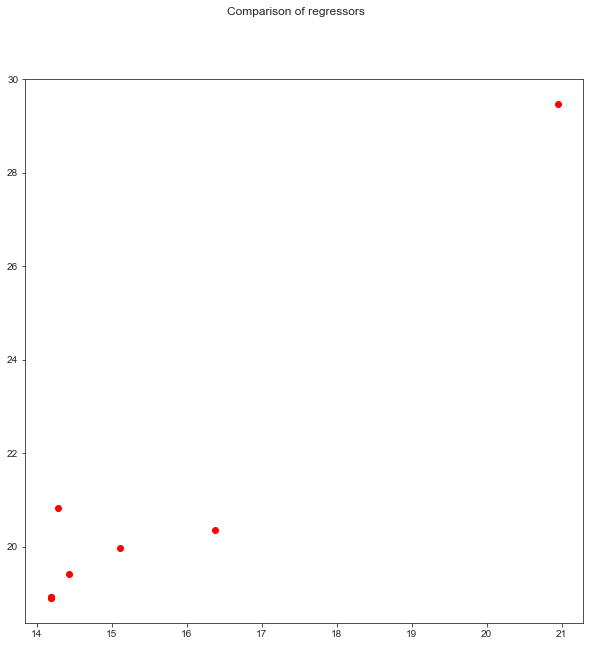

In [95]:
fig = plt.figure()
fig.suptitle('Comparison of regressors')
ax = fig.add_subplot(111)
plt.plot(MAE,RMSE,'ro')
plt.show()

## Comparison for classification

### Definition of the models

In [77]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

### Cross validation

In [86]:
seed = 7

results = []
names = []
scoring = 'accuracy'
for name, model in models[0:1]:
    #kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, df[columns], df[target], cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

C:\Users\satou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "C:\Users\satou\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on thi

C:\Users\satou\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\satou\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\satou\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\satou\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


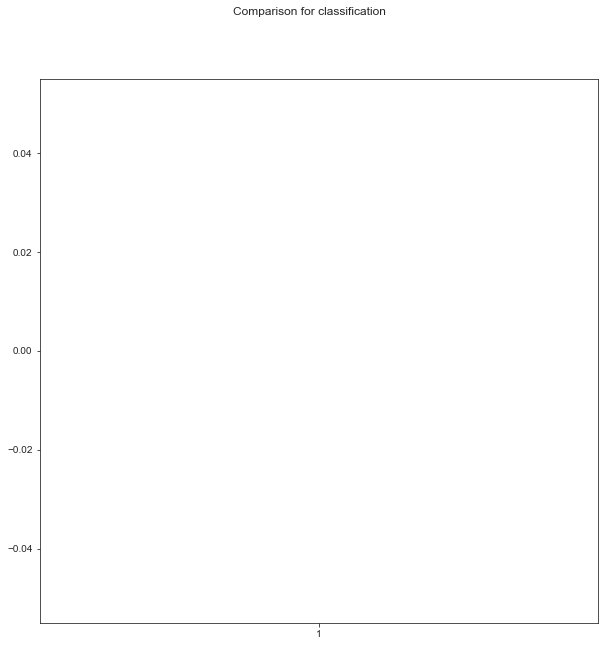

In [87]:
fig = plt.figure()
fig.suptitle('Comparison for classification')
plt.boxplot(results)
plt.show()